<img src='https://upload.wikimedia.org/wikipedia/fr/thumb/e/ed/Logo_Universit%C3%A9_du_Maine.svg/1280px-Logo_Universit%C3%A9_du_Maine.svg.png' width="300" height="500">
<br>
<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Mathématiques pour l'IA</h1>
    <p style='text-align: center;'>Master Informatique 1</p>
    <p style='text-align: center;'>Anhony Larcher</p>
</div>

Ce premier tutoriel est organisé en deux parties:
* un guide pour l'environnement [**Jupyter-Notebook**](https://jupyter.org/documentation).
* un guide pour le calcul matriciel en python

# Introduction à Python et Jupyter-Notebook

Un notebook est un environnement d'exécution interactif dans lequel le code peut etre executé, on peut aussi faire de l'affichage, de la visualisation graphique.

Dans un notebook Jupyter, il est possible:
* d'ajouter des cellules (ajoutez en une en dessous de celle-ci)
* de créer des cellules de différentes nature (texte, code, texte formaté: markdown)
* de diviser une cellule en deux (après avoir tapé deux lignes dans votre nouvelle cellule, divisez la en deux)
* de supprimer des cellules (supprimez celle que vous venez d'ajouter)
* de redémarrer l'interpreteur python pour ré-initialiser l'environnement.


In [3]:
"""
Placez le fichier test.py dans le même répertoire que ce notebook.
Vous pouvez importer ce module et utiliser la function "operation" comme suit:
"""
import test

print(f"Le resulat est : {test.operation(4,3)}")

Le resulat est : 12


Modifiez maintenant le code de cette fonction pour avoir:
```
def operation(a, b):
	return a - b
```
Ré-exécutez la cellule précédente. Qu'observez-vous?

Dans un **notebook** re-executer une cellule avec un import ne re-importe pas les modules.

Deux options:
* redémarrer le kernel (arrêter python et redémarrer)
* utiliser le module **autoreload** comme ci-dessous

puis re-executez la cellule du début.

In [2]:
%load_ext autoreload
%autoreload 2

Il est possible d'excuter des commandes **shell** directement depuis vore notebook en utilisant le préfixe **!**.

Vous pouvez donc combiner du code **shell** et python pour par exemple créer un répertoire, écrire dans un fichier,
l'afficher puis le supprimer.

In [5]:
# Crée un répertoire toto et un repertoire figures
!mkdir toto
!mkdir figures

# Crée un fichier texte et écrit dedans
with open("toto/my_file.txt", "w") as fh:
    fh.write("J'écris dans mon fichier texte")

# Affiche le contenu du fichier texte ainsi créé
with open("toto/my_file.txt", "r") as fh:
    text = fh.readlines()

print(text[0])

J'écris dans mon fichier texte


Maintenant supprimez le fichier créé et le répertoire toto en utilisant des commandes SHELL

In [6]:
!rm toto/my_file.txt

On peut donc installer des packages python directement depuis un notebook
Il est cependant déconseillé d'utiliser directement 
```
!conda install --yes numpy
!pip install matplotlib
```
préférez la méthode suivante:


In [7]:
#
import sys
!conda install --yes --prefix {sys.prefix} numpy

!conda install --yes --prefix {sys.prefix} matplotlib

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done
Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


L'ajout du préfix et l'utilisation de ```python``` assurent que le module est installé pour la bonne version de python et dans le bon environnement.

In [8]:
# Comment voir où sont installé les modules?
import numpy
print("Numpy est installé dans:")
print(numpy.__file__)
print(f"La version installée est :{numpy.__version__}")

Numpy est installé dans:
/home/romain/anaconda3/envs/mathsIA/lib/python3.10/site-packages/numpy/__init__.py
La version installée est :1.23.1


<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:20px;">Attention à l'ordre d'execution des cellules (regardez bien le numéro à gauche)</h1>
</div>

## Graphiques dans Notebook

[Matplotlib](https://matplotlib.org/) est la bibliothèque graphique de base en python (par la suite vous pourrez utilser [Seaborn](https://seaborn.pydata.org/))

Pour utiliser **matplotlib** directement dans le notebook, plusieurs options sont possible comme par exemple:

In [12]:
#%matplotlib inline
%matplotlib notebook

import matplotlib.pyplot as plt

Pour activer le mode interactif dans le notebook:
```python
%matplotlib notebook 
```


Pour afficher uniquement des images statiques
```python
%matplotlib inline
```

Tracez maintenant une figure simple avec **matplotlib**, comparez les différents modes possibles

<IPython.core.display.Javascript object>


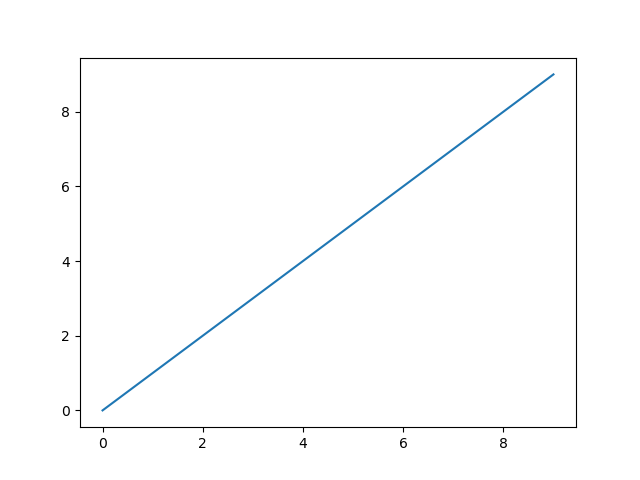

In [15]:
fig = plt.figure()
plt.plot(numpy.arange(10))

Sauvez la figure avec:

In [16]:
fig.savefig('figures/my_figure.png')

Notez que différents formats de fichiers peuvent être utilisés.

# Calcul scientifique avec Numpy

[Numpy](https://numpy.org) est la bibliothèque de calcul numérique par défaut pour Python.

D'autres modules sont disponibles, les principaux sont:
* [Scipy](https://www.scipy.org/) avec une syntaxe plus *mathématiques*
* [PyTorch](https://pytorch.org/) dédié au Deep Learning, reprend la plupart des éléments de Numpy et permet d'effectuer les calculs sur CPU ou GPU
* [TensorFlow](https://www.tensorflow.org/) projet concurrent de PyTorch, très similaire

**Numpy** permet de simplement et rapidement manipuler des données numériques.

## La classe de base: numpy.ndarray

La classe de base est le **numpy.ndarray**.
"ndarray" : n-dimensional array (vecteur multi-dimensionnel) permet de stocker et traiter des données numériques mais également textuelles sous forme de scalaire, vecteur, tenseur à **n** dimensions.

Les exemples suivant montre un petit aperçu (vraiment petit) des nombreuses fonctionnalités qu'offre Numpy.

**Avant d'implémenter des choses en python, demandez-vous toujours si Numpy ne le fait pas déjà.**

In [17]:
hVec = numpy.ones(5)
hVec

array([1., 1., 1., 1., 1.])

In [18]:
vVec = numpy.ones((5, 1))
vVec

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

Comme vous l'avez vu en cours, il y a une différence entre vecteur et matrice. 
C'est encore plus vrai dans ``Numpy``où un vecteur peut être:
* à 1 seule dimension
* ligne 
* colonne

Ainsi les dimensions de hVec et vVec sont différentes:

In [19]:
print(f"Shape of hVec: {hVec.shape}")
print(f"Shape of vVec: {vVec.shape}")

Shape of hVec: (5,)
Shape of vVec: (5, 1)


Créez dans la cellule suivante un vecteur ligne, un vecteur colonne et calculer leurs produits vectoriels
* ligne multiplié par colonne (produit scalaire)
* colonne multiplié par ligne (produit matriciel)

In [31]:
vligne = numpy.array([1,3,4])
print(vligne)

vcol = numpy.array([2,5,3]).reshape(3,1)
print(vcol)

print("produit vectoriel : ", numpy.cross(vligne,vcol.T))

[1 3 4]
[[2]
 [5]
 [3]]
produit vectoriel :  [[-11   5  -1]]


### Initialiser des numpy.array
On peut simplement initiliser des numpy.ndarray pour contenir des zéros:

In [32]:
zvec = numpy.zeros((3,3))
zvec

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Des valeurs aléatoires (avec différentes distributions).

In [33]:
rvec = numpy.random.randn(4)
rvec

array([1.54191697, 0.39296773, 0.34602196, 1.04025202])

Une allocation rapide de la mémoire sans modifier les valeurs.

In [35]:
evec = numpy.empty((2,3), dtype=numpy.float64)
evec

array([[ 75.1       , 149.76666667, 224.43333333],
       [299.1       , 373.76666667, 422.4       ]])

**Attention**: Numpy défini un type par défaut lorsqu'on crée un *ndarray* sans en spécifier.

En utilisant la cellule suivante, trouvez quel est le type utilisé par défaut dans Numpy et affichez le.

In [41]:
test = numpy.ndarray((5,3))
print(test.dtype)

float64


On peut initialiser un ndarray à partir d'une liste **python** unidimensionnelle

In [42]:
lvec = numpy.array([1, 2, 3])
lvec

array([1, 2, 3])

multi-dimensionnelle:

In [43]:
lvec2d = numpy.array([[1, 2, 3],[4,5,6]])
lvec2d

array([[1, 2, 3],
       [4, 5, 6]])

**Attention** un `numpy.array` doit avoir des lignes, colonnes (dimensions) qui sont toutes de la même taille.

Expliquez ce qui se passe dans la cellule suivante.

In [45]:
lvec2d = numpy.array([[1, 2, 3],[4,5]])
lvec2d

#Pas les mêmes dimensions donc création d'un vecteurs d'objets list

/tmp/ipykernel_37160/3673109122.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lvec2d = numpy.array([[1, 2, 3],[4,5]])


array([list([1, 2, 3]), list([4, 5])], dtype=object)

Il est possible de créer des **ndarray** plus complexes:

In [46]:
print(f"Premier exemple: {numpy.repeat(3, 4)}")
x = numpy.array([[1,2],[3,4]])
print(f"Deuxième exemple: {numpy.repeat(x, 2)}")

Premier exemple: [3 3 3 3]
Deuxième exemple: [1 1 2 2 3 3 4 4]


Mais aussi avec la méthode ``numpy.tile(A, reps)``.
Testez la dans la cellule suivante

In [48]:
print(x)
print(numpy.tile(x, 2))

[[1 2]
 [3 4]]
[[1 2 1 2]
 [3 4 3 4]]


On peut facilement **typer** les variable à utiliser 
([type](https://numpy.org/doc/stable/reference/arrays.dtypes.html)):

In [50]:
ivec = numpy.random.randint((2,2), dtype=int)
ivec

array([1, 1])

et vérifier le type des variables:

In [51]:
ivec.dtype

dtype('int64')

**Attention** par défaut, le type d'un numpy.ndarray est **float64**, ce qui consomme beaucoup de mémoire et n'est pas souvent utile.

### Opérations de base sur les **numpy.ndarray**

Les **numpy.ndarray** se manipulent comme des vecteurs, matrices ou tenseurs et un grand nombre de méthodes mathématiques sont déjà implémentées pour calculer :
* des moyennes
* des écarts types
* les max, min
* trouver les indices des max, min
* calculer la somme des valeurs
* calculer la somme culmulée des valeurs

La documentation complète de [**Numpy**](https://numpy.org/doc/stable/reference/index.html#reference) est très utile car de nombreuses méthodes sont implémentées.

Pour tester quelques fonctions de Numpy nous allons d'abord initialiser un vecteur d'entiers aléatoirement.

In [52]:
vec = numpy.random.randint(10, size=10)
vec

array([9, 0, 9, 1, 6, 2, 5, 5, 8, 7])

**Attention** à gérer l'initialisation de la [**graine de l'algorithme aléatoire**](https://en.wikipedia.org/wiki/Random_seed) (*seed*).

**La génération de nombres aléatoires est déterministe.**

Python a une graine, Numpy, une autre, PyTorch une troisième...

Ces graines sont particulièrement importantes pourr la reproductibilité (confiance scientifique et debuggage).
Exemple:

In [53]:
numpy.random.seed(42)
print(numpy.random.randint(10, size=10))
print(numpy.random.randint(10, size=10))

[6 3 7 4 6 9 2 6 7 4]
[3 7 7 2 5 4 1 7 5 1]


Que se passe-t'il dans la cellule suivante?

In [54]:
numpy.random.seed(42)
print(numpy.random.randint(10, size=10))
numpy.random.seed(42)
print(numpy.random.randint(10, size=10))
print(numpy.random.randint(10, size=10))

[6 3 7 4 6 9 2 6 7 4]
[6 3 7 4 6 9 2 6 7 4]
[3 7 7 2 5 4 1 7 5 1]


In [56]:
print(f"Vecteur vec: {vec}")
print(f"On affiche la valeur minimum de vec avec : {vec.min()}")
print(f"On affiche la valeur maximum de vec avec : {vec.max()}")
print(f"On calcule le somme cumulée avec : {vec.cumsum()}")
vec.sort() # trie le ndarray en place.
print(f"Le vecteur trié est: {vec}")

Vecteur vec: [0 1 2 5 5 6 7 8 9 9]
On affiche la valeur minimum de vec avec : 0
On affiche la valeur maximum de vec avec : 9
On calcule le somme cumulée avec : [ 0  1  3  8 13 19 26 34 43 52]
Le vecteur trié est: [0 1 2 5 5 6 7 8 9 9]


### Inverse de matrice

Créez une matrice aléatoire de dimension (3, 3).

Calculez le déterminant de cette matrice et inversez là.

Calculez ensuite le produit de cette matrice par son inverse.

Trouvez le rang de cette matrice.

In [96]:
mat = numpy.random.randint(10, size=(3,3), dtype=int)
print("mat : \n", mat)

det = numpy.linalg.det(mat)
print("det : ", det)

inv = numpy.linalg.inv(mat)
print("inv : \n", inv)

produit = mat.dot(inv)
print ("produit : \n", produit)

rang = numpy.linalg.matrix_rank(produit)
print("rang : ", rang)

mat : 
 [[2 1 8]
 [7 9 6]
 [8 3 3]]
det :  -362.9999999999999
inv : 
 [[-0.02479339 -0.05785124  0.18181818]
 [-0.07438017  0.15977961 -0.12121212]
 [ 0.14049587 -0.00550964 -0.03030303]]
produit : 
 [[ 1.00000000e+00  0.00000000e+00 -2.77555756e-17]
 [ 0.00000000e+00  1.00000000e+00  2.77555756e-17]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
rang :  3


### Normes de vecteurs et de matrice

Numpy permet de calculer rapidement un grand nombre de [**normes**](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)

**Note** vous avez vu les systèmes d'équations linéaires. La résolution d'un système peut êter faite sans inverser la matrice (de façon plus efficace) avec les fonction `solve`de Numpy.

### Indexing

In [97]:
vec = numpy.random.randint(10, size=10)
print(f"Nouveau vecteur: {vec}")
print(f"On peut trouver l'indice de la valeur minimum avec: {vec.argmin()}")
print(f"On peut trouver l'indice de la valeur maximum avec: {vec.argmax()}")
print(f"On peut trouver les indices de toutes les valeurs triés avec : {vec.argsort()}")
print(f"Et on obtient donc le vecteur trié en faisant: {vec[vec.argsort()]}")


Nouveau vecteur: [0 7 2 6 1 1 6 5 2 8]
On peut trouver l'indice de la valeur minimum avec: 0
On peut trouver l'indice de la valeur maximum avec: 9
On peut trouver les indices de toutes les valeurs triés avec : [0 4 5 2 8 7 3 6 1 9]
Et on obtient donc le vecteur trié en faisant: [0 1 1 2 2 5 6 6 7 8]


<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Exercice</h1>
    <p style='text-align: left;'> </p>
</div>



Écrire un code qui:
* initialise un vecteur de dimension $10$ avec des valeurs aléatoire tirées uniformément entre 1 et 2
* soustrait à chaque valeur de cette matrice le minimum de ces valeurs
* affiche l'indice de la valeur minimum dans le vecteur en utilisant une `f-string`

In [114]:
vec = numpy.random.randint(1,3, size=10)
print(vec)

sous = vec - vec.min()
print(sous)

print(f"Indice de la valeur minimum : {vec.argmin()}")

[2 2 2 1 2 2 2 2 1 2]
[1 1 1 0 1 1 1 1 0 1]
Indice de la valeur minimum : 3


### Vues et indexage

En pratique, les **ndarray** sont stockés sous forme d'un tableau dans la mémoire de la machine.

Afin d'accélerer les calculs ou de simplifier les traitements, un grand nombre de méthodes sont disponibles pour visualier les données des **ndarray**.

On peut accéder aux valeurs de différentes façons:

In [115]:
A = numpy.arange(16)
print(f"Vecteur original: {A}\n")

A = A.reshape(4, 4)
print(f"ndArray redimensioné\n {A}\n")

# par indexage:
print(A[1:3, :3]) # lignes de 1 comprise à 3 non comprise et colonnes jusqu'à 3 non comprise.

Vecteur original: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

ndArray redimensioné
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

[[ 4  5  6]
 [ 8  9 10]]


In [116]:
# Avec des booléens:
B = numpy.random.randint(0,2,16).reshape(4, 4).astype(bool)

print("On crée un masque de booléen\n")
print(B)

print("\nQu'on utilise pour sélectionner une partie du ndarray A")
A[B]

On crée un masque de booléen

[[False False False False]
 [False False  True False]
 [False False  True  True]
 [False  True False False]]

Qu'on utilise pour sélectionner une partie du ndarray A


array([ 6, 10, 11, 13])

**Attention** la dimension du ndArray renvoyé n'est pas celle de `A`

In [117]:
# On peut utiliser un pas de lecture
A = numpy.arange(10)
print(A)
print(f"Avec un pas de 3: {A[::3]}")

print(f"A l'envers: {A[::-1]}")

print(f"A l'envers, sur un segment et avec un pas donné: {A[8:2:-2]}")

[0 1 2 3 4 5 6 7 8 9]
Avec un pas de 3: [0 3 6 9]
A l'envers: [9 8 7 6 5 4 3 2 1 0]
A l'envers, sur un segment et avec un pas donné: [8 6 4]


Voici quelques méthodes pratiques:

* la méthode **flatten** renvoit une copie du **ndarray** sous forme d'un vecteur de dimension 1

In [65]:
M = numpy.array([[1, 2, 3],[4,5,6]])
print("Matrice M originale:")
print(M)

# Collapse M and display
print("\nEn utilisant flatten:")
print(M.flatten())

Matrice M originale:
[[1 2 3]
 [4 5 6]]

En utilisant flatten:
[1 2 3 4 5 6]


* la méthode **reshape** renvoir une copie redimensionnée d'un **ndarray**

In [118]:
M = numpy.array([[1, 2, 3],[4,5,6]])
print("Matrice M originale:")
print(M)

print("\nEn utilisant reshape:")
print(M.reshape(3, 2))

# Attention, selon le format d'indexing on peut obtenir différents résultats
print("\nEn utilisant reshape:")
print(M.reshape((3, 2), order='F'))

Matrice M originale:
[[1 2 3]
 [4 5 6]]

En utilisant reshape:
[[1 2]
 [3 4]
 [5 6]]

En utilisant reshape:
[[1 5]
 [4 3]
 [2 6]]


<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Exercice</h1>
    <p style='text-align: left;'> </p>
</div>

On peut simplement extraire la diagonale d'un **ndarray**:

Écrire un code qui:
* initialise une matrice de réels (**float64**) de dimension $3 \times 3$
* Extraire sa diagonale et afficher ses dimensions (shape)
* Modifier cette diagonale pour obtenir un vecteur de dimension $3 \times 1$ avec la méthode **newaxis**

In [68]:
# Solution
M = numpy.random.rand(3, 3).astype(numpy.float32)
print(M)
print(numpy.diag(M).shape)
print(numpy.diag(M)[:, numpy.newaxis].shape)
print(numpy.diag(M)[:, numpy.newaxis])

[[0.10789143 0.03142919 0.6364104 ]
 [0.31435597 0.5085707  0.9075665 ]
 [0.24929222 0.41038293 0.75555116]]
(3,)
(3, 1)
[[0.10789143]
 [0.5085707 ]
 [0.75555116]]


La méthode **lib.stride_tricks.sliding_window_view** permet de se déplacer dans un **ndarray** en fixant un pas précis et en affichant une zone déterminée.

In [69]:
M = numpy.arange(16).reshape((4, 4))
print("Matrice M originale:")
print(M)

window_size = (2, 2)
M_view = numpy.lib.stride_tricks.sliding_window_view(M, window_size)
M_view

Matrice M originale:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[[[ 0,  1],
         [ 4,  5]],

        [[ 1,  2],
         [ 5,  6]],

        [[ 2,  3],
         [ 6,  7]]],


       [[[ 4,  5],
         [ 8,  9]],

        [[ 5,  6],
         [ 9, 10]],

        [[ 6,  7],
         [10, 11]]],


       [[[ 8,  9],
         [12, 13]],

        [[ 9, 10],
         [13, 14]],

        [[10, 11],
         [14, 15]]]])

On peut également changer le pas de déplacement

In [70]:
print("Matrice M originale:")
print(M)
M_view = numpy.lib.stride_tricks.sliding_window_view(M, window_size)[::2, ::2]
M_view

Matrice M originale:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[[[ 0,  1],
         [ 4,  5]],

        [[ 2,  3],
         [ 6,  7]]],


       [[[ 8,  9],
         [12, 13]],

        [[10, 11],
         [14, 15]]]])

### Calcul matriciel

Écrire un code pour calculer $X = A \times B$
Où $A$ et $B$ sont deux matrices de dimension $100 \times 100$ définies par:

In [4]:
# Solution

<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Exercice</h1>
    <p style='text-align: left;'> </p>
</div>

Calculez le produit matriciel $A \times B$ et mesurez le temps d'execution avec le module **time**

Effectuer le même calcul avec **Numpy** et la méthode **dot**.

In [5]:
# Solution


Quelle est la différence entre:
    
A * B
et 
A.dot(B)

## Broadcasting

**Numpy** effectue la plupart du temps les opérations terme à terme.

Ce qui nécessite d'avoir des ndarray de même taille. 

Exemple:

In [74]:
a = numpy.array([1.0, 2.0, 3.0])
b = numpy.array([2.0, 2.0, 2.0])
a * b

array([2., 4., 6.])

Cependant, dans certaines conditions (dimensions compatibles), Numpy effectue du **broadcasting** et permet de faire des calculs avec différentes dimensions.

Exemple:

In [75]:
from numpy import array
a = array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Règle de broadcasting</h1>
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:18px;">Pour le broadcasting, la taille de l'axe commun entre les deux ndarray doit être la même ou l'une d'elle doit être 1.</h1>
    <p style='text-align: left;'> </p>
</div>

<img src='https://numpy.org/doc/stable/_images/broadcasting_1.png' width="300" height="500">

Créez un ndarray de dimension 4 x 3 et un autre de dimension 3 que vous sommerez.

<img src='https://numpy.org/doc/stable/_images/broadcasting_2.png' width="300" height="500">

In [76]:
# Essayez ensuite avec un ndarray de dimension 4 x 3 et un autre de dimension 4

# Qu'en concluez-vous?
# Vous pouvez maintenant essayer avec un ndarray de dimension 4 x 3 et un autre de dimension 4 x 1

In [82]:
A43 = numpy.ones((4, 3))
# B3 = numpy.ones(4) * 4
B3 = numpy.ones((4, 1)) * 4
print(A43 + B3)


[[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]


Il est également possible d'ajouter une dimension temporaire au 2e ndarray pour effectuer des produits vectoriels.

Que se passe-t'il dans l'exemple suivant?

In [83]:
a = numpy.array([0.0, 10.0, 20.0, 30.0])
b = numpy.array([1.0, 2.0, 3.0])
a[:,numpy.newaxis] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

<img src='https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png' width="300" height="500">


## Somme de Einstein

La notation d'Einstein est un raccourci de notation utile pour la manipulation des équations concernant des coordonnées.

In [86]:
A = numpy.arange(25).reshape(5,5)
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


Peut être utilisée pour calculer la trace d'une matrice:

In [87]:
numpy.einsum('ii', A) # On somme tous les termes de coordonnées (i, i) les valeurs limites de 'i' sont implicites.

60

Pour extraire la diagonale:

In [90]:
numpy.einsum('ii->i', A) 
# On extrait les termes de coordonnées (i, i) 
# qu'on place dans un vecteur (unidimensionnel) à l'indice 'i''

array([ 0,  6, 12, 18, 24])

Pour sommer les colonnes ou les lignes selon un axe déterminé:

In [91]:
numpy.einsum('ij->i', A)

array([ 10,  35,  60,  85, 110])

<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Exercice</h1>
    <p style='text-align: left;'> </p>
</div>

Calculez le produit matriciel d'une matrice $A$ avec sa transposée sans utiliser la transposée explicite (donc avec une sommation de Einstein).

In [92]:
A = numpy.arange(25).reshape(5,5)
# Avec la transposée:
print(A.dot(A.T))

[[  30   80  130  180  230]
 [  80  255  430  605  780]
 [ 130  430  730 1030 1330]
 [ 180  605 1030 1455 1880]
 [ 230  780 1330 1880 2430]]


In [6]:
# Solution


Différents modes d'optimisation peuvent être appliquées

L'efficacité du calcul n'est pas toujours évidente, n'hésitez à tester et chronométrer les différentes options

In [101]:
a = numpy.ones(64).reshape(2,4,8)

#Chronométrez les différentes options en utilisant la somme de einstein brute ou en donnant au paramètre
# optimize les valeurs suivantes:  'optimal', 'greedy'


#for iteration in range(500):
#    _ = numpy.einsum('ijk,ilm,njm,nlk,abc->',a,a,a,a,a)

# Puis en utilisant un einsum_path pour optimiser de la façon suivante:
#path = np.einsum_path('ijk,ilm,njm,nlk,abc->',a,a,a,a,a, optimize='optimal')[0]


#for iteration in range(500):
#    _ = numpy.einsum_path('ijk,ilm,njm,nlk,abc->',a,a,a,a,a, optimize='optimal')[0]




Resultat obtenu en 0.28317737579345703 secondes
